In [1]:
import pandas as pd   
import numpy as np   
from sklearn.metrics.pairwise import sigmoid_kernel      
from sklearn.metrics.pairwise import cosine_similarity       
from sklearn import preprocessing   
#For Visualizations   
import matplotlib.pyplot as plt       
import seaborn as sns     
import plotly.express as px            
%matplotlib inline                   

In [4]:
df=pd.read_csv("dataset.csv")
df.head(10)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,popularity,year
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future,4,2021
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino,5,2021
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future,5,2021
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House,3,2021
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys,2,2021
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4,0.264,1,Sneakin’,Drake,6,2021
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4,0.308,1,Childs Play,Drake,4,2021
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4,0.393,1,Gyöngyhajú lány,Omega,2,2021
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4,0.398,1,I've Seen Footage,Death Grips,0,2021
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4,0.386,1,Digital Animal,Honey Claws,0,2021


In [5]:
#Get the shape of the data (the number of rows & cols)
df.shape

(2017, 19)

In [6]:
#Checking NULL Values in columns
df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
popularity          0
year                0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,popularity,year
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.535944,0.187590,0.618422,2.463564e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702,3.861676,2016.666832
std,583.288262,0.259989,0.161029,8.195271e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091,6.848213,3.152074
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000,0.000000,2012.000000
25%,504.000000,0.009630,0.514000,2.006250e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000,0.000000,2014.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000,0.000000,2016.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000,6.000000,2019.000000
max,2022.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000,55.000000,2022.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   int64  
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [9]:
df.corr()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,popularity,year
Unnamed: 0,1.000000,0.132689,-0.138980,-0.104068,-0.039583,-0.104929,-0.035539,-0.039185,0.022076,0.060826,-0.134946,-0.027816,-0.053040,-0.077379,-0.865583,0.057478,-0.719001
acousticness,0.132689,1.000000,-0.179894,0.071488,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627,-0.076865,-0.134341
danceability,-0.138980,-0.179894,1.000000,0.004914,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706,-0.023487,0.178295
duration_ms,-0.104068,0.071488,0.004914,1.000000,-0.144542,0.305464,0.023777,0.022905,-0.273782,-0.074910,-0.079601,-0.076300,-0.040072,-0.120031,0.146608,-0.006119,-0.019719
energy,-0.039583,-0.646319,0.038557,-0.144542,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688,0.066246,0.090953
instrumentalness,-0.104929,0.144397,-0.130561,0.305464,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594,-0.020104,-0.057315
key,-0.035539,-0.081037,0.022325,0.023777,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594,-0.023476,0.003288
liveness,-0.039185,-0.117126,-0.132044,0.022905,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364,0.002924,0.003276
loudness,0.022076,-0.562021,0.104362,-0.273782,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000,0.063125,0.084143
mode,0.060826,0.068028,-0.047867,-0.074910,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336,-0.043275,0.006930


In [10]:
import warnings
warnings.filterwarnings("ignore")

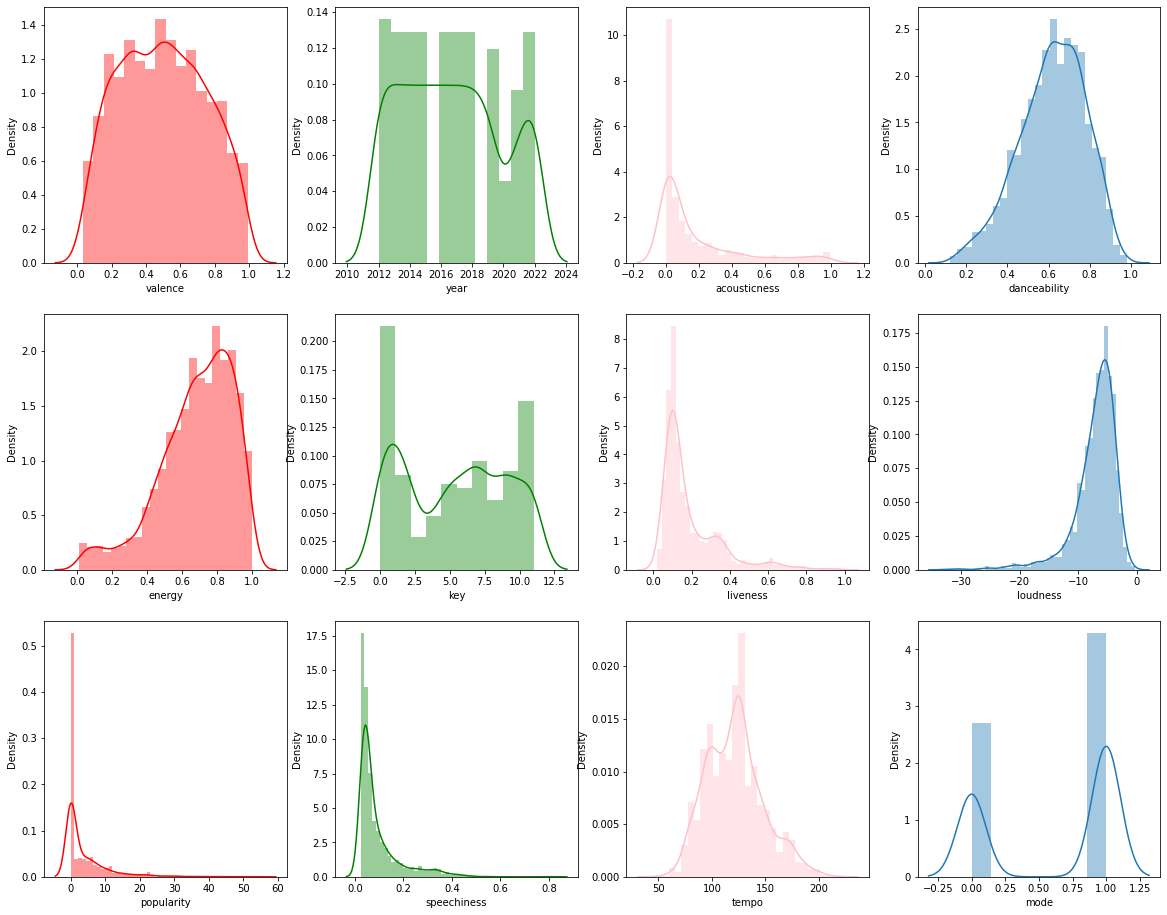

In [11]:
fig,ax = plt.subplots(3,4,figsize=(20,16))

sns.distplot(df['valence'],ax=ax[0,0],color="red")
sns.distplot(df['year'],ax=ax[0,1],color="green")
sns.distplot(df['acousticness'],ax=ax[0,2],color="pink")
sns.distplot(df['danceability'],ax=ax[0,3])
sns.distplot(df['energy'],ax=ax[1,0],color="red")
sns.distplot(df['key'],ax=ax[1,1],color="green")
sns.distplot(df['liveness'],ax=ax[1,2],color="pink")
sns.distplot(df['loudness'],ax=ax[1,3])
sns.distplot(df['popularity'],ax=ax[2,0],color="red")
sns.distplot(df['speechiness'],ax=ax[2,1],color="green")
sns.distplot(df['tempo'],ax=ax[2,2],color="pink")
sns.distplot(df['mode'],ax=ax[2,3])

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text major ticklabel objects>)

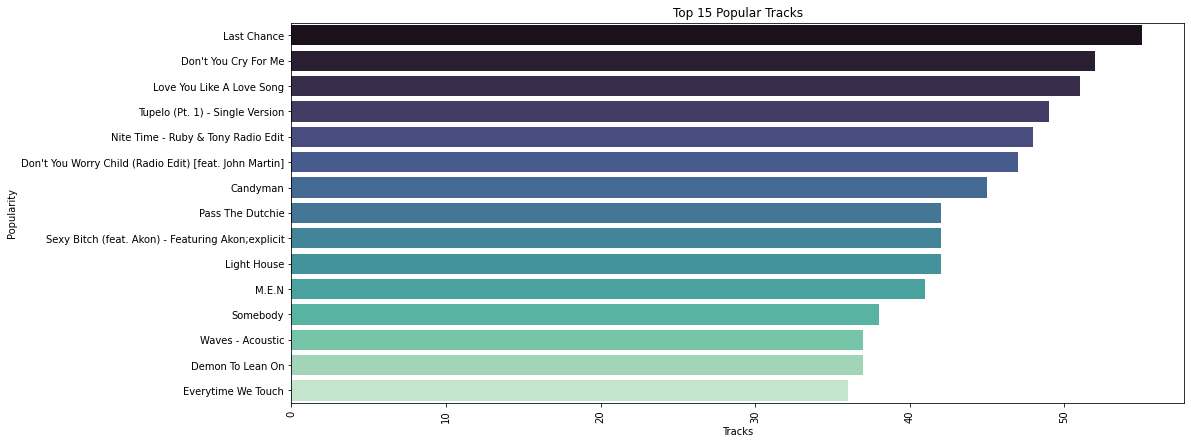

In [12]:
#Most Popular Tracks
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("song_title")['popularity'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

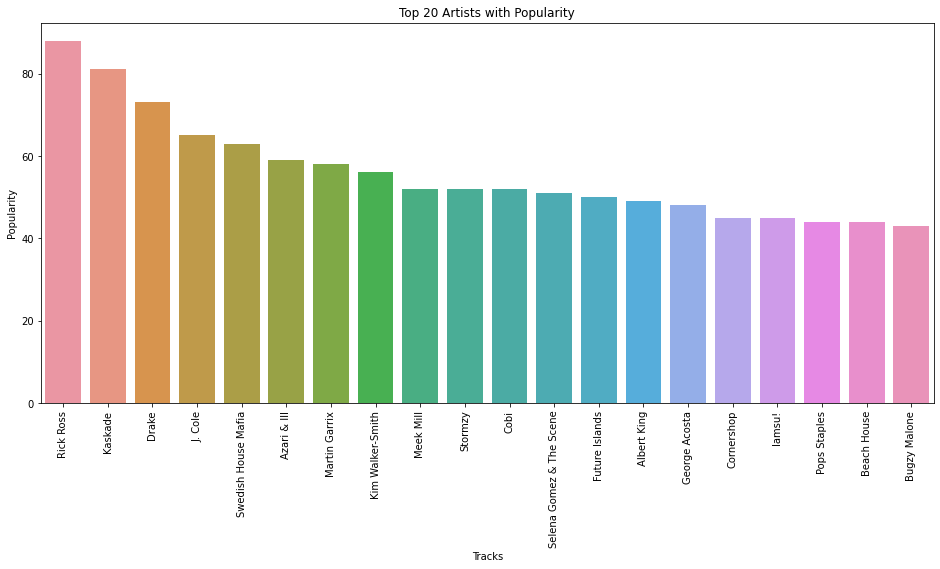

In [16]:
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("artist")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(popular.index,popular)
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

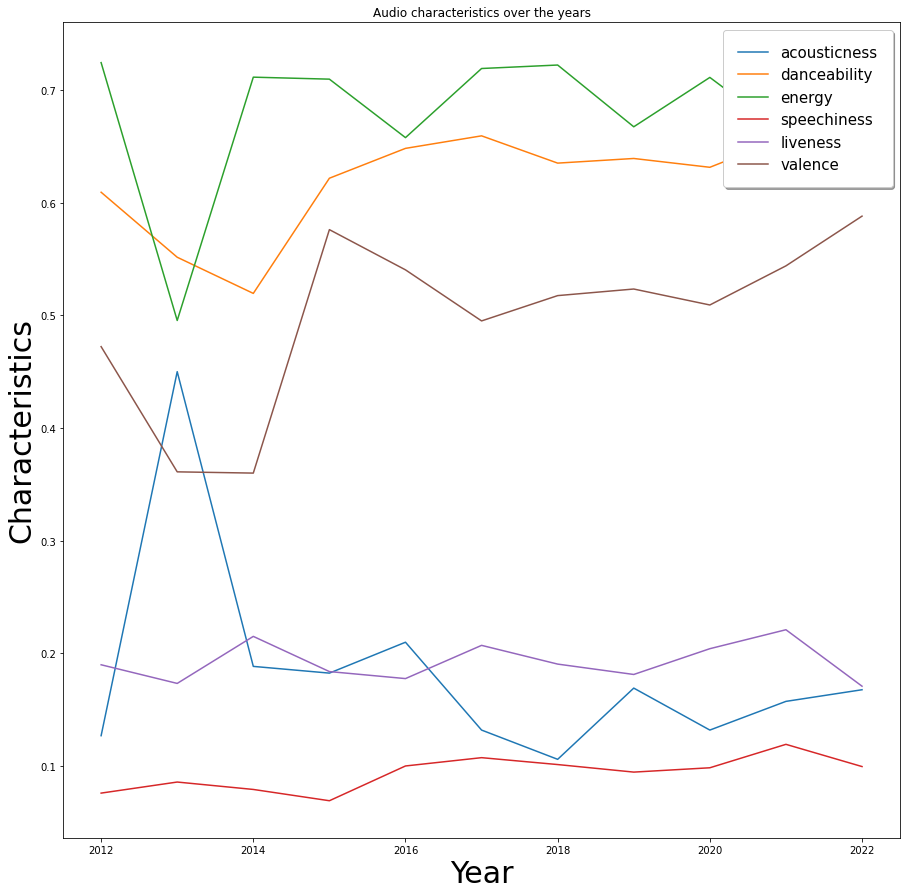

In [17]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(15,15))
for c in columns:
    x = df.groupby('year')[c].mean()
    sns.lineplot(x.index,x,label=c)
plt.title('Audio characteristics over the years')
plt.xlabel('Year',fontsize=30)
plt.ylabel('Characteristics',fontsize=30)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 15}, loc = 'upper right')
plt.show()

In [18]:
y=pd.DataFrame(df['artist'].value_counts().head()).reset_index()
y.columns=['Artist','Songs_Count']
y

,Artist,Songs_Count
0,Drake,16
1,Rick Ross,13
2,Disclosure,12
3,WALK THE MOON,10
4,Backstreet Boys,10


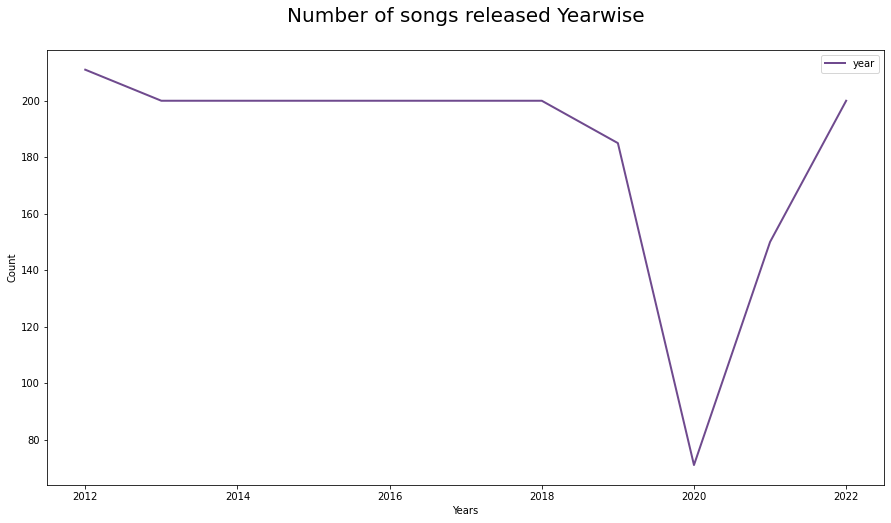

In [19]:
year = pd.DataFrame(df['year'].value_counts())
year = year.sort_index()
ax=year.plot(kind='line',figsize=(15,8) ,color='#6f4a8e', linewidth=2)
plt.title("Number of songs released Yearwise",y=1.05,fontsize=20)
plt.xlabel('Years')
plt.ylabel('Count')
ax.axes.get_xaxis().set_visible(True)

In [21]:
from yellowbrick.target import FeatureCorrelation

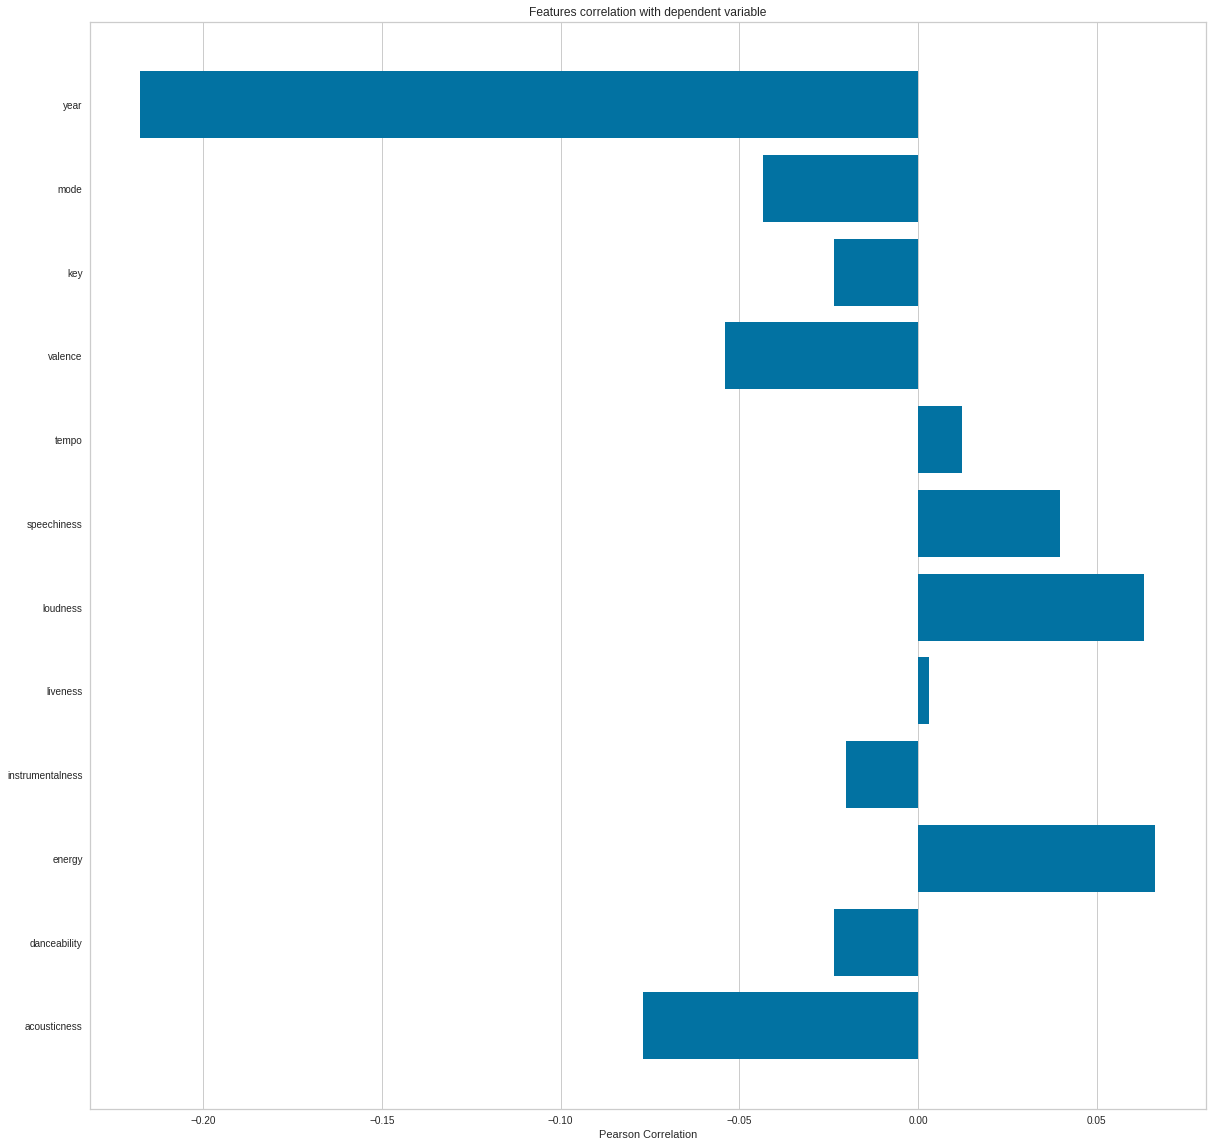

In [22]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','key','mode','year']

X, y = df[feature_names], df['popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show() 

In [25]:
# For validation
from sklearn.model_selection import train_test_split


cols = list(pd.read_csv('dataset.csv'))
df1 = pd.read_csv('dataset.csv', usecols=[i for i in cols if i not in ['song_title']])

# Remove duplicated
df1 = df1[~df1.duplicated()==1]

#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(df1.drop('popularity', axis=1), df1['popularity'], test_size = 0.2, random_state = 42)

In [26]:
X_train.corr()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,year
Unnamed: 0,1.000000,0.136967,-0.144972,-0.099463,-0.036154,-0.118767,-0.051682,-0.010791,0.027995,0.075681,-0.144524,-0.045643,-0.041260,-0.086932,-0.863416,-0.712003
acousticness,0.136967,1.000000,-0.186070,0.082861,-0.639213,0.118776,-0.087287,-0.112546,-0.549396,0.070276,-0.102731,-0.117586,-0.183979,-0.163838,-0.135946,-0.134231
danceability,-0.144972,-0.186070,1.000000,0.010810,0.033417,-0.107639,0.039340,-0.132563,0.096496,-0.043084,0.122777,-0.141324,0.125022,0.438604,0.184923,0.174426
duration_ms,-0.099463,0.082861,0.010810,1.000000,-0.166578,0.321256,0.033890,0.004248,-0.309451,-0.086045,-0.076492,-0.061328,-0.050497,-0.113976,0.144986,-0.033617
energy,-0.036154,-0.639213,0.033417,-0.166578,1.000000,-0.121789,0.062382,0.216297,0.756905,-0.068145,0.084810,0.159082,0.170011,0.292242,0.039772,0.089483
instrumentalness,-0.118767,0.118776,-0.107639,0.321256,-0.121789,1.000000,-0.009839,-0.004385,-0.356581,-0.039570,-0.149109,0.032895,-0.089487,-0.180322,0.170599,-0.050844
key,-0.051682,-0.087287,0.039340,0.033890,0.062382,-0.009839,1.000000,0.042730,0.053547,-0.204082,0.038460,0.035443,0.031095,0.022110,0.052862,0.002935
liveness,-0.010791,-0.112546,-0.132563,0.004248,0.216297,-0.004385,0.042730,1.000000,0.155201,-0.005885,0.102198,0.020449,0.011550,-0.043949,0.007953,-0.013426
loudness,0.027995,-0.549396,0.096496,-0.309451,0.756905,-0.356581,0.053547,0.155201,1.000000,-0.038565,0.084222,0.147479,0.127698,0.213002,-0.073614,0.081616
mode,0.075681,0.070276,-0.043084,-0.086045,-0.068145,-0.039570,-0.204082,-0.005885,-0.038565,1.000000,-0.052600,-0.048527,-0.036242,-0.029799,-0.080268,-0.005713


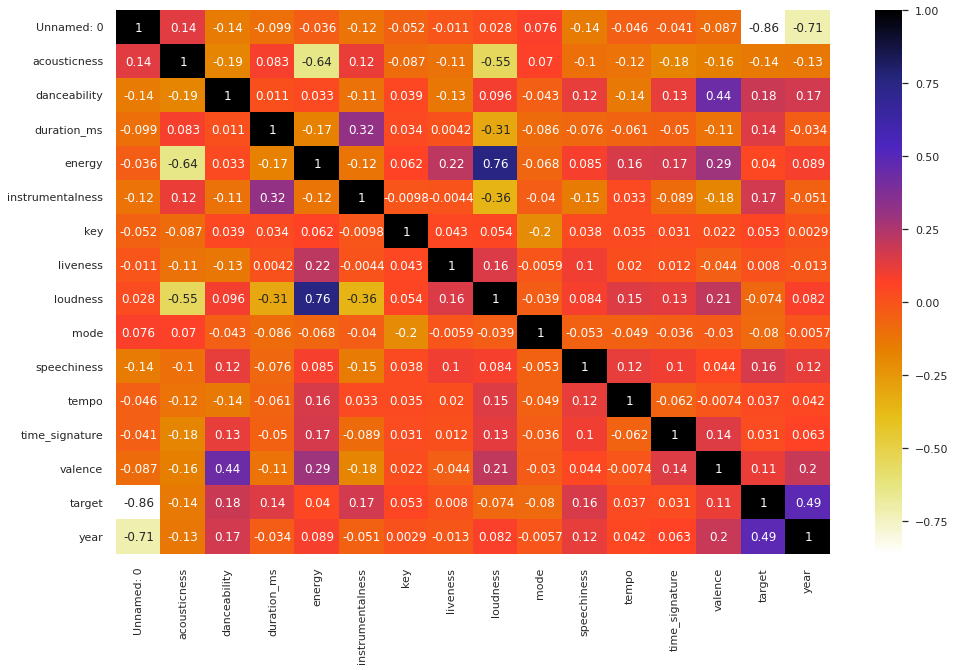

In [27]:
plt.figure(figsize=(16,10)) 
sns.set(style="whitegrid")
corr = X_train.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)

In [28]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [29]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

3

In [30]:
corr_features

{'loudness', 'target', 'year'}

In [31]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,artist
1555,1555,0.74800,0.520,341667,0.0748,0.633000,8,0.1020,1,0.0497,107.327,4,0.134,Marcus Roberts
526,526,0.07260,0.739,386907,0.5260,0.000000,4,0.2150,0,0.1010,143.948,4,0.374,Kendrick Lamar
393,393,0.00210,0.646,219754,0.8920,0.006260,10,0.1170,1,0.0331,119.998,4,0.935,Holy Ghost!
1788,1788,0.78900,0.664,145707,0.3200,0.000000,4,0.1520,1,0.0322,141.916,3,0.710,Rags Cast
433,433,0.01980,0.517,245013,0.4910,0.000001,11,0.0786,0,0.0341,104.996,4,0.331,M83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,1112,0.07860,0.724,200813,0.9040,0.000000,8,0.2260,0,0.0966,90.999,4,0.851,Enrique Iglesias
693,693,0.26800,0.651,182384,0.7730,0.000000,6,0.1720,0,0.2620,129.882,4,0.418,A-1
1493,1493,0.00466,0.722,182728,0.6140,0.000000,11,0.1060,0,0.1150,154.903,4,0.504,Lil Uzi Vert
921,921,0.78300,0.418,219800,0.0962,0.000066,0,0.1360,1,0.0559,184.721,3,0.342,Rose Royce


In [32]:
feature_cols=['acousticness', 'danceability', 'energy',
              'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
              'speechiness', 'tempo', 'time_signature', 'valence','popularity']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df =scaler.fit_transform(df[feature_cols])

In [ ]:
print(normalized_df[:2])

[[0.01024843 0.82482599 0.4263629  0.02243852 0.18181818 0.15386234
  0.74114059 1.         0.51444066 0.59603317 0.75       0.26243209
  0.07272727]
 [0.19999772 0.72041763 0.35008137 0.00626025 0.09090909 0.12439486
  0.69216224 1.         0.07100517 0.6544742  0.75       0.57793565
  0.09090909]]


In [33]:
# Create a pandas series with song titles as indices and indices as series values 
indices = pd.Series(df.index, index=df['song_title']).drop_duplicates()

# Create cosine similarity matrix based on given matrix
cosine = cosine_similarity(normalized_df)

def generate_recommendation(song_title, model_type=cosine ):
    """
    Purpose: Function for song recommendations 
    Inputs: song title and type of similarity model
    Output: Pandas series of recommended songs
    """
    # Get song indices
    index=indices[song_title]
    # Get list of songs for given songs
    score=list(enumerate(model_type[index]))
    # Sort the most similar songs
    similarity_score = sorted(score,key = lambda x:x[1],reverse = True)
    # Select the top-10 recommend songs
    similarity_score = similarity_score[1:11]
    top_songs_index = [i[0] for i in similarity_score]
    # Top 10 recommende songs
    top_songs=df['song_title'].iloc[top_songs_index]
    return top_songs

In [34]:
recommendations=generate_recommendation('Walk With Me',cosine).values
print("Recommended Songs:\n~~~~~~~~~~~~~~~~~~~")
for x in recommendations:
  print(x)

Recommended Songs:
~~~~~~~~~~~~~~~~~~~
Master Of None
Uncast Shadow Of A Southern Myth
Fuego
Tides of Neptune
5ft7
Here Comes The Night Time II
What I Might Do - Club Mix
Count Your Blessings
What I Might Do - Club Mix
Acamar


In [36]:
print("Recommended Songs:")
print(generate_recommendation('Childs Play',cosine).values)

Recommended Songs:
['Tennis Court' 'Dope' 'Function - feat. YG, IAmSu & Problem'
 '$ave Dat Money (feat. Fetty Wap & Rich Homie Quan)' 'World Restart'
 'All I Have to Give' 'Xanny Family' 'Unbreakable' 'Slow Down'
 'Under Mi Sensi']


In [37]:
# Create sigmoid kernel matrix based on given matrix
sig_kernel = sigmoid_kernel(normalized_df)

print("Recommended Songs:")
print(generate_recommendation('Jenny',sig_kernel).values)

Recommended Songs:
['GodLovesUgly' 'Pretty Fly (For a White Guy)'
 'When They Fight, They Fight' 'Sippin On Some Syrup' 'Hollaback Girl'
 'P.Y.T. (Pretty Young Thing)'
 'Blueberry (Pills & Cocaine) (feat. Danny Brown)'
 'Black or White - Single Version' 'When We Stand Together'
 'Fashion Killa']


In [38]:
# Create sigmoid kernel matrix based on given matrix
sig_kernel = sigmoid_kernel(normalized_df)

print("Recommended Songs:")
print(generate_recommendation('Redbone',sig_kernel).values)

Recommended Songs:
['La Bicicleta' 'Pass The Dutchie' 'Hula Hoop'
 'Piss Test (feat. Juicy J & Dany Brown)' 'Sippin On Some Syrup'
 'The Happy Song' '6 In The Morning' 'Fashion Killa'
 'No Such Thing as a Broken Heart' 'Dutchie Courage']
